In [2]:
import pandas as pd

# 여대생 몸무게
data = [48, 54, 47, 50, 53, 43, 45, 43, 44, 47, 58, 46, 46, 63, 49, 50, 48, 43, 46, 45, 50, 53, 51, 58, 52, 53, 47, 49, 45, 42, 51, 49, 58, 54, 45, 53, 50, 69, 44, 50, 58, 64, 40 ,57, 51, 69, 58, 47, 62, 47, 40, 60, 48, 47, 53, 47 ,52, 61, 55, 55, 48, 48, 46, 52, 45, 38, 62, 47, 55, 50, 46, 47, 55, 48, 50, 50, 54, 55, 48, 50]
ser = pd.Series(data=data)
ser

0     48
1     54
2     47
3     50
4     53
      ..
75    50
76    54
77    55
78    48
79    50
Length: 80, dtype: int64

In [140]:
# 도수분포표
bins = pd.interval_range(start=36, end=71, freq=5) # 범위 지정
out = pd.cut(x=ser, bins=bins)
# 도수
table = out.value_counts(sort=False)
table

(36, 41]     3
(41, 46]    16
(46, 51]    31
(51, 56]    16
(56, 61]     8
(61, 66]     4
(66, 71]     2
dtype: int64

In [141]:
# 계급
s1 = pd.Series(data=bins)
# 계급값 -> 중앙값인데 .mid로 할 수 있지만 오른쪽 값이 미만 값이라...
s2 = pd.Series([s1.iloc[i].left + 2 for i in range(7)])
# 도수
s3 = table.reset_index(drop=True)
# 상대도수 -> 다 더해서 1
s4 = s3 / len(data)
# 누적도수 -> 마지막에 총 데이터 갯수여야 함
s5_list = []
result = 0
for i in range(7):
    result += s3.iloc[i]
    s5_list.append(result)
s5 = pd.Series(s5_list)

df = pd.concat([s1, s2, s3, s4, s5], ignore_index=True, axis=1)
df.columns = ['계급(이상~미만)', '계급값', '도수', '상대도수', '누적도수']
df

,계급(이상~미만),계급값,도수,상대도수,누적도수
0,"(36, 41]",38,3,0.0375,3
1,"(41, 46]",43,16,0.2000,19
2,"(46, 51]",48,31,0.3875,50
3,"(51, 56]",53,16,0.2000,66
4,"(56, 61]",58,8,0.1000,74
5,"(61, 66]",63,4,0.0500,78
6,"(66, 71]",68,2,0.0250,80


<AxesSubplot:ylabel='Frequency'>

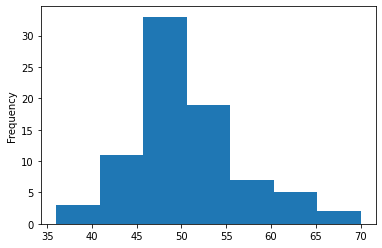

In [135]:
# 히스토그램
ser.plot.hist(bins=7, range=[36, 70])